In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Diwali Sales Data.csv' , encoding = 'unicode_escape')
df.shape

(11251, 15)

if try simply read_csv then it will raise an <b> *<u color = 'red'>UnicodeDecodeError </u> : 'utf-8' codec can't decode byte 0xa0 in position 267: invalid start byte * </b>  
<br>
so i am using `encoding = 'unicode_escape'`

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# droping Status and unnamed1 column : because there is all NAN values
df.drop(['Status' , 'unnamed1'] , axis = 1 , inplace = True)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
(df['Amount'].isnull().sum() / df.shape[0]) * 100

0.10665718602790863

in `Amount` Column 0.1% values are NAN , droping it

In [ ]:
df.dropna(subset = ['Amount'] , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
# changing data type for efficient memory use
convert_data_type = {
    'User_ID' : str ,
    'Product_ID' : 'category',
    'Gender' : 'category' ,
    'Age Group' : 'category',
    'Age' : np.int8,
    'Marital_Status' : 'category' ,
    'State' : 'category',
    'Zone' : 'category',
    'Occupation' : 'category',
    'Product_Category' : 'category',
    'Orders' : 'category',
    'Amount' : np.int16
}

df = df.astype(convert_data_type)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   User_ID           11239 non-null  object  
 1   Cust_name         11239 non-null  object  
 2   Product_ID        11239 non-null  category
 3   Gender            11239 non-null  category
 4   Age Group         11239 non-null  category
 5   Age               11239 non-null  int8    
 6   Marital_Status    11239 non-null  category
 7   State             11239 non-null  category
 8   Zone              11239 non-null  category
 9   Occupation        11239 non-null  category
 10  Product_Category  11239 non-null  category
 11  Orders            11239 non-null  category
 12  Amount            11239 non-null  int16   
dtypes: category(9), int16(1), int8(1), object(2)
memory usage: 492.0+ KB


59 % memory less consuming

# EDA

## Customer Name

In [ ]:
df['Cust_name'].value_counts()

Cust_name
Vishakha       42
Shreyshi       32
Sudevi         30
Akshat         29
Alejandro      28
               ..
Overcash        2
Madan Mohan     2
Madhav          2
Laal            1
Bindu           1
Name: count, Length: 1250, dtype: int64

<b color = 'green'>almost each customer has order twice or more times</b>

## Gender

<Axes: ylabel='count'>

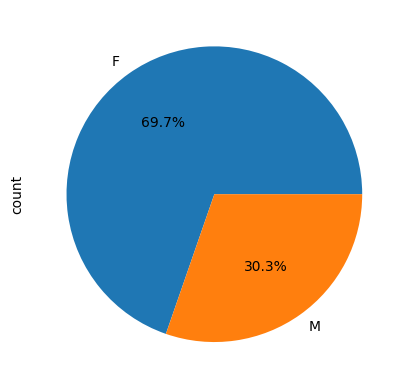

In [ ]:
# total count vs Gender
df['Gender'].value_counts().plot(kind = 'pie' , autopct = '%0.1f%%')

<b color = 'green' > Females placed more orders then men</b>

<Axes: ylabel='Amount'>

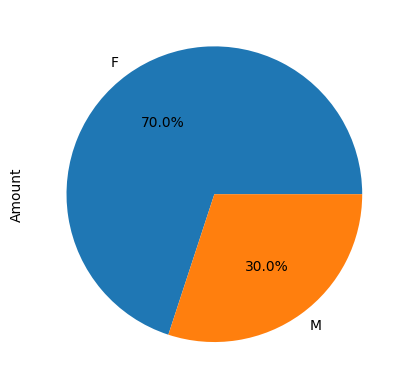

In [ ]:
# total Amount vs Gender
df.groupby('Gender')['Amount'].sum().plot(kind = 'pie' , autopct = '%0.1f%%')

<b color = 'green' > Females put more orders in term of amount then men</b>

## Age

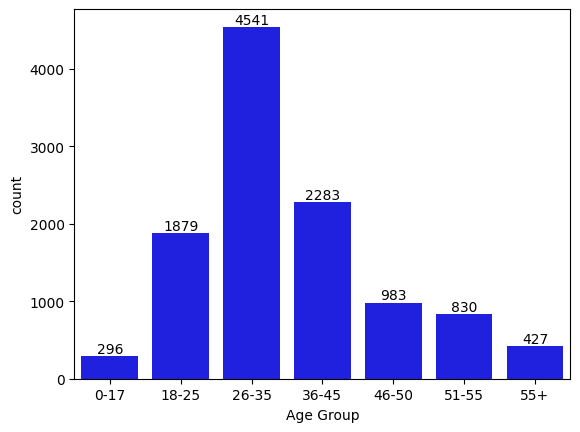

In [ ]:
# order count vs Age Group
# df['Age Group'].value_counts().plot(kind = 'bar')
ax = sns.countplot(data = df , x = 'Age Group' , color = 'blue')

for bar in ax.containers:
  ax.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

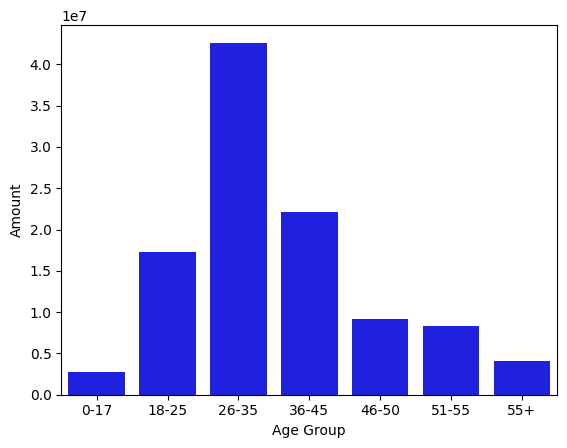

In [ ]:
# total amount vs Age group
temp = df.groupby('Age Group')['Amount'].sum().reset_index()

sns.barplot(data = temp , x = 'Age Group' , y = 'Amount' , color = 'blue')

<ipython-input-142-ba6c483fe8c2>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  ax = sns.countplot(data = df , x ='Age Group' , hue = 'Gender', color = 'blue' )


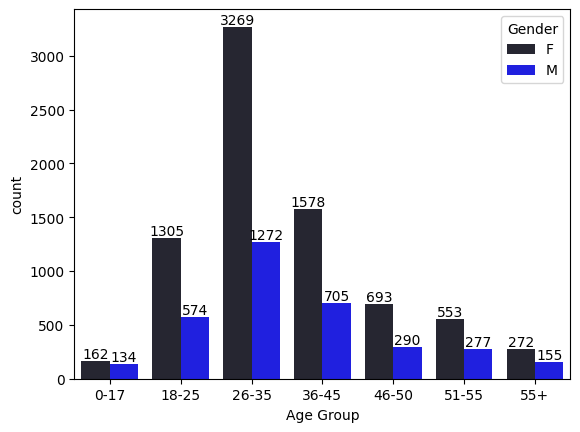

In [ ]:
# total orders vs Age Group
ax = sns.countplot(data = df , x ='Age Group' , hue = 'Gender', color = 'blue' )

for bar in ax.containers:
  ax.bar_label(bar)

<b color = 'green' > Most order where placed by 26 - 35 age group</b>

## Marital status

<Axes: xlabel='Marital_Status'>

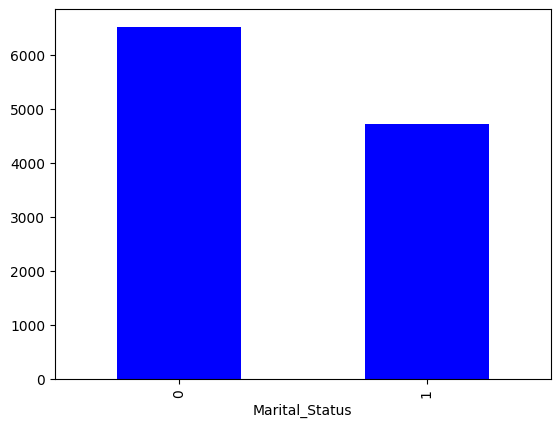

In [ ]:
# total orders vs Marital status
df['Marital_Status'].value_counts().plot(kind = 'bar' , color = 'blue')

<Axes: xlabel='Marital_Status'>

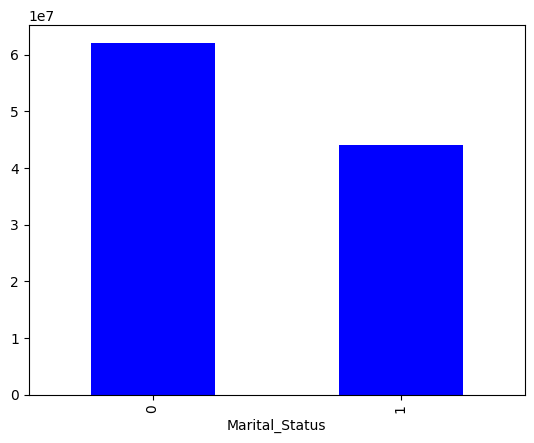

In [ ]:
# total amount vs Marital status
df.groupby('Marital_Status')['Amount'].sum().plot(kind = 'bar',color = 'blue')

<b color = 'green' > Un-maried persons placed more orders</b>

## state

<Axes: ylabel='State'>

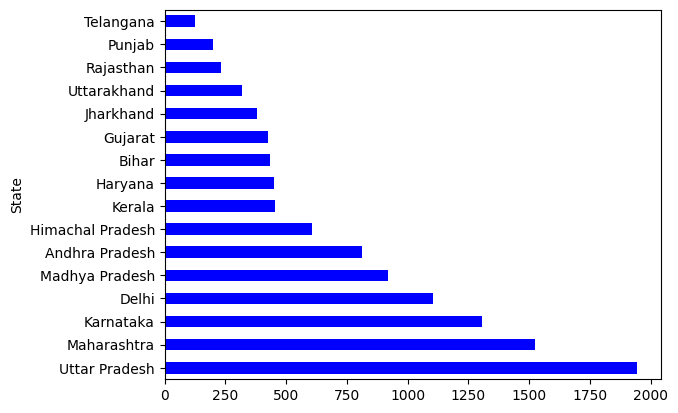

In [ ]:
# total orders vs States
df['State'].value_counts().plot(kind = 'barh' , color = 'blue')

<b color = 'green' > 1000+ orders comes from  
- Delhi ,  
- Karnataka ,  
- Maharashtra ,  
-Uttar Pradesh</b>

<Axes: xlabel='State'>

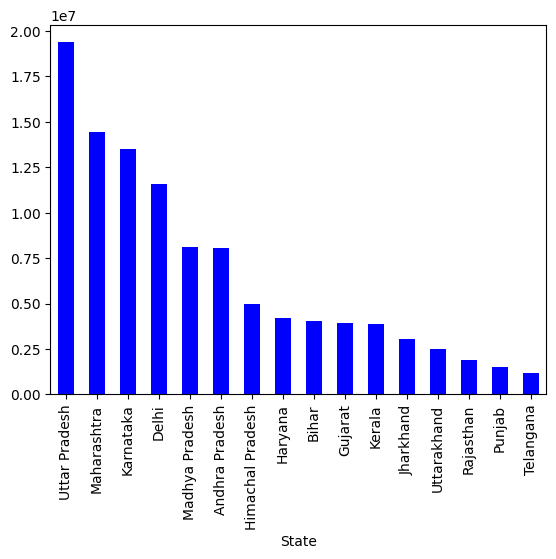

In [ ]:
# total amount vs States
df.groupby('State')['Amount'].sum().sort_values( ascending = False).plot(kind = 'bar' , color = 'blue')

## Zone

<Axes: ylabel='Zone'>

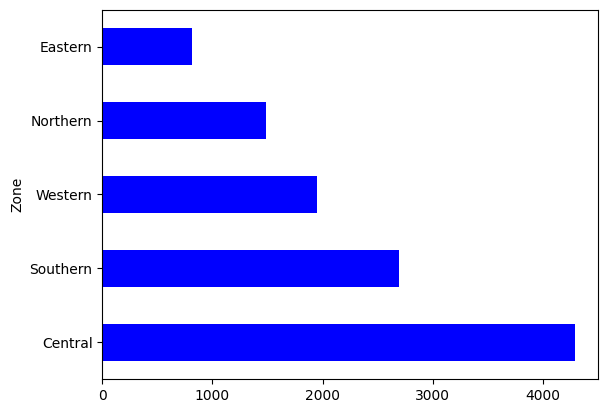

In [ ]:
# total orders vs Zone
df['Zone'].value_counts().plot(kind = 'barh' , color = 'blue')

<b color = 'green' > Central region has most order placed</b>

<Axes: xlabel='Zone'>

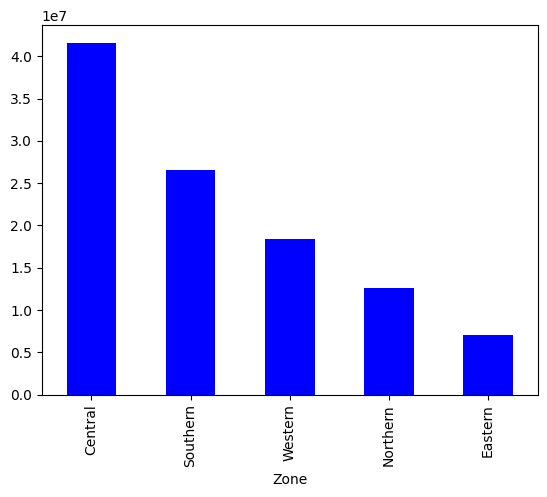

In [ ]:
# total amount vs Zone
df.groupby('Zone')['Amount'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'blue' )

## Occupation

<Axes: ylabel='Occupation'>

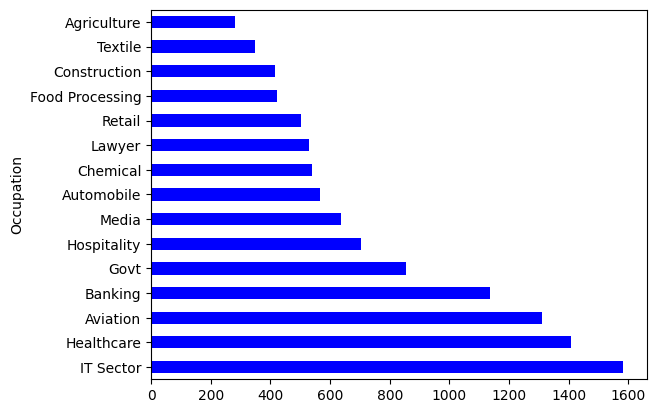

In [ ]:
# total orders vs Occupation
df['Occupation'].value_counts().plot(kind = 'barh' , color = 'blue')

<b color = 'green' > Most orders comes from  
- Banking ,   
- Aviation ,  
- Heathcare ,
- IT Sector</b>

<Axes: xlabel='Occupation'>

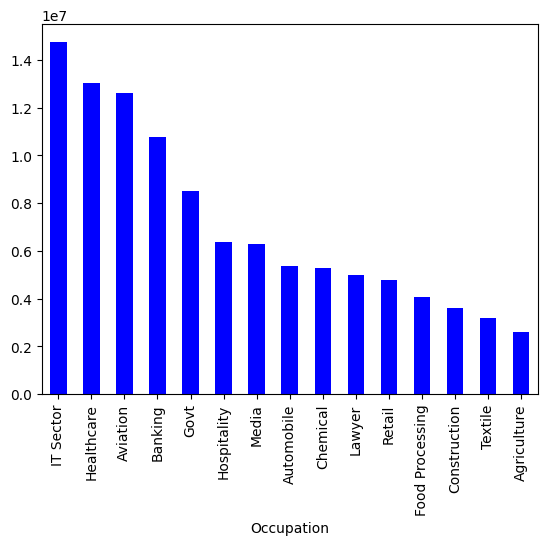

In [ ]:
# total amount vs Occupation
df.groupby('Occupation')['Amount'].sum().sort_values(ascending = False).plot(kind = 'bar' , color = 'blue')

# Product Category

<Axes: ylabel='Product_Category'>

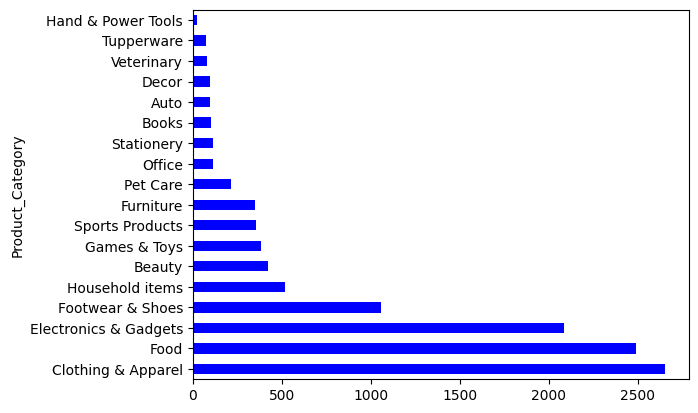

In [ ]:
# total orders vs Product Category
df['Product_Category'].value_counts().plot(kind = 'barh' , color = 'blue')

<b color = 'green' > Most orders comes from
- Electronics & Gadgets ,  
- Food ,  
-Clothing & Apparel</b>

<Axes: xlabel='Product_Category'>

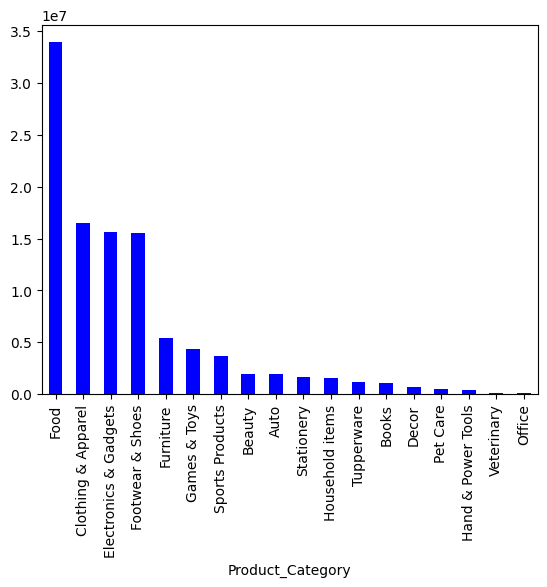

In [ ]:
# total amount vs Product Category
df.groupby('Product_Category')['Amount'].sum().sort_values(ascending = False).plot(kind = 'bar' , color = 'blue')

## orders

<Axes: ylabel='count'>

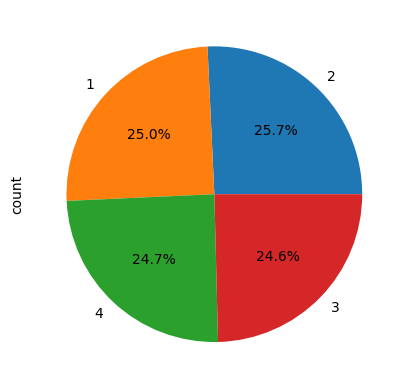

In [ ]:
# total orders vs orders
df['Orders'].value_counts().plot(kind = 'pie' , autopct = '%0.1f%%')

every order number is almost similar

<Axes: xlabel='Orders'>

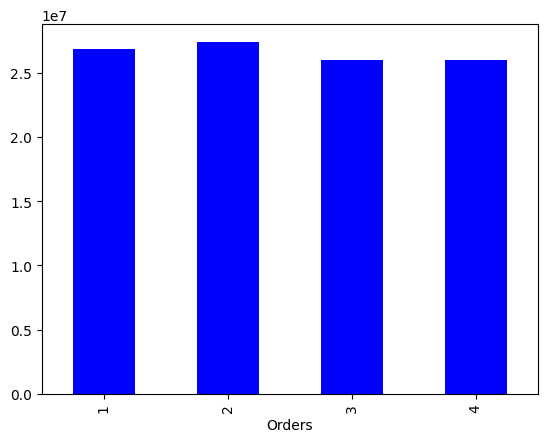

In [ ]:
# total amount vs Orders
df.groupby('Orders')['Amount'].sum().plot(kind = 'bar',color = 'blue')

### Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category